# July 2020 Climate Statistics
Station MD-FR-41, New Market 1.7 NW,
Location:  Lat: 39.4090   Lon: -77.2997,   Elev: 443ft

# Read and build daily weather observation dataset
Dataset is transcribed from my written weather observation log for July 2020.

In [58]:
from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("July 2020")
fname1 = 'July2020.txt' #Daily weather observation log for New Market, MD in table format

#Read daily weather observation log for July 2020
climo = np.loadtxt(fname1, dtype='str', usecols=range(0, 5))

#Build Pandas series objects for each observation list
day,maxtemp,mintemp,avgtemp,rainfall = np.loadtxt(fname1, usecols=range(0, 5), skiprows=1, unpack=True)
day_list = pd.Series(day,dtype='int32')
maxtemp = pd.Series(maxtemp,dtype='int32')
mintemp = pd.Series(mintemp,dtype='int32')
avgtemp = pd.Series(avgtemp,dtype='int32')
rainfall = pd.Series(rainfall)

#Count number of days in July with a high temperature greater than or equal to 90 degrees Fahrenheit (F)
day = 0
for temp in maxtemp:
    if temp >= 90:
        day = day + 1

#Build Pandas dataframe from each series object and print as a table
july2020 = pd.DataFrame({'Day':day_list,'Max Temp':maxtemp,'Min Temp':mintemp,'Avg Temp':avgtemp,'Rainfall':rainfall})
col_titles = ['Day','Max Temp','Min Temp','Avg Temp','Rainfall']
july2020 = july2020[col_titles]
print(july2020)



July 2020
    Day  Max Temp  Min Temp  Avg Temp  Rainfall
0     1        85        69        77      0.06
1     2        91        65        78      0.00
2     3        95        68        82      0.00
3     4        93        70        82      0.00
4     5        93        71        82      0.00
5     6        95        73        84      0.00
6     7        85        72        79      0.00
7     8        91        71        81      0.00
8     9        88        70        79      0.00
9    10        88        71        80      0.00
10   11        86        70        78      0.14
11   12        89        66        78      0.00
12   13        87        67        77      0.14
13   14        89        67        78      0.00
14   15        92        65        79      0.00
15   16        85        73        79      0.00
16   17        94        73        84      0.04
17   18        96        71        84      0.00
18   19        98        72        85      0.00
19   20        99        79   

# Read and build long-term climate dataset

In [59]:
#Read 50-year long-term time series dataset "AN81m" for July 1970 - 2019
fname2 = 'July_1970_2019.txt' #50-year historical climate record for New Market, MD
climo_jul = np.loadtxt(fname2, dtype='str', usecols=range(0, 5))

#Build Pandas dataframe from time series dataset and print as a table
july = pd.DataFrame(climo_jul, columns=['Year', 'Rainfall', 'Min Temp', 'Mean Temp', 'Max Temp'])
july['Year'] = july['Year'].str.replace(r'\D07', '')
july['Year'] = july['Year'].astype(int)
july['Rainfall'] = july['Rainfall'].astype(float)
july['Min Temp'] = july['Min Temp'].astype(float)
july['Mean Temp'] = july['Mean Temp'].astype(float)
july['Max Temp'] = july['Max Temp'].astype(float)
print(july)


    Year  Rainfall  Min Temp  Mean Temp  Max Temp
0   1970      7.11      63.0       74.2      85.5
1   1971      3.96      60.7       72.7      84.8
2   1972      2.45      63.9       74.1      84.4
3   1973      2.52      63.6       74.8      86.0
4   1974      1.70      62.1       73.9      85.8
5   1975      5.01      62.8       73.5      84.2
6   1976      5.29      60.8       71.8      82.8
7   1977      3.15      62.8       75.7      88.6
8   1978      4.06      61.6       72.7      83.8
9   1979      3.79      62.0       72.6      83.3
10  1980      3.14      63.1       76.0      88.9
11  1981      4.47      63.3       74.2      85.1
12  1982      4.04      63.1       74.7      86.3
13  1983      0.69      62.0       75.6      89.2
14  1984      4.39      62.3       73.4      84.5
15  1985      4.71      61.3       73.9      86.5
16  1986      2.62      63.6       76.9      90.3
17  1987      4.63      64.4       77.3      90.2
18  1988      4.94      64.0       78.1      92.2


# Calculate descriptive statistics

In [60]:
#Calculate descriptive statistics for July 2020 daily observations
mean_maxtemp = np.mean(maxtemp)
med_maxtemp = np.median(maxtemp)
max_maxtemp = np.amax(maxtemp)
mean_mintemp = np.mean(mintemp)
med_mintemp = np.median(mintemp)
min_mintemp = np.amin(mintemp)
mean_avgtemp = np.mean(avgtemp)
mean_avgtemp = round(mean_avgtemp,1)
med_avgtemp = np.median(avgtemp)
tot_rainfall = np.sum(rainfall)
tot_rainfall = round(tot_rainfall,2)

#Calculate descriptive statistics for long-term time series
mean_july_50yr_rainfall = july['Rainfall'].mean()
mean_july_50yr_rainfall = round(mean_july_50yr_rainfall,2)
mean_july_50yr_meantemp = july['Mean Temp'].mean()
mean_july_50yr_meantemp = round(mean_july_50yr_meantemp,1)
mean_july_50yr_maxtemp = july['Max Temp'].mean()
mean_july_50yr_maxtemp = round(mean_july_50yr_maxtemp,1)
min_july_50yr_rainfall = july['Rainfall'].min()
max_july_50yr_meantemp = july['Mean Temp'].max()
max_july_50yr_meantemp_idx = july[['Mean Temp']].idxmax()
year_maxmeantemp = july.iloc[max_july_50yr_meantemp_idx,0]
anomaly_avgtemp = mean_avgtemp - mean_july_50yr_meantemp
anomaly_rainfall = tot_rainfall - mean_july_50yr_rainfall

#Print descriptive statistics
print("Temperature measured in degrees Fahrenheit (F), rainfall measured in inches (in)\n")
print("July climate statisitcs for 1970 - 2019\n")
print("July 50-year Mean Rainfall = ", mean_july_50yr_rainfall)
print("July 50-year Mean Temperature = ", mean_july_50yr_meantemp)
print("July 50-year Mean Max Temperature = ", mean_july_50yr_maxtemp)
print("July 50-year Minimum Monthly Rainfall = ", min_july_50yr_rainfall)
print("July 50-year Maximum Mean Temperature = ", max_july_50yr_meantemp)
print("July 50-year Maximum Mean Temperature Index = ", max_july_50yr_meantemp_idx)
print("Year of Maximum Mean Temperature = ", year_maxmeantemp)

print("\nClimate statisitcs for July 2020\n")
print("Mean daily max temp = ", mean_maxtemp)
print("Median daily max temp = ", med_maxtemp) 
print("Maximum daily max temp = ", max_maxtemp) 
print("Number of days with a max temperature 90 deg or above = ", day)
print("Mean daily min temp = ", mean_mintemp)
print("Median daily min temp = ", med_mintemp) 
print("Minimum daily min temp = ", min_mintemp) 
print("Mean daily avg temp = ", mean_avgtemp)
print("Daily avg temp anomaly = +", anomaly_avgtemp)
print("Median daily avg temp = ", med_avgtemp) 
print("Total rainfall = ", tot_rainfall)
print("Rainfall anomaly = ", anomaly_rainfall)


Temperature measured in degrees Fahrenheit (F), rainfall measured in inches (in)

July climate statisitcs for 1970 - 2019

July 50-year Mean Rainfall =  4.1
July 50-year Mean Temperature =  75.5
July 50-year Mean Max Temperature =  86.9
July 50-year Minimum Monthly Rainfall =  0.69
July 50-year Maximum Mean Temperature =  80.3
July 50-year Maximum Mean Temperature Index =  Mean Temp    41
dtype: int64
Year of Maximum Mean Temperature =  41    2011
Name: Year, dtype: int32

Climate statisitcs for July 2020

Mean daily max temp =  91.6
Median daily max temp =  92.0
Maximum daily max temp =  99
Number of days with a max temperature 90 deg or above =  20
Mean daily min temp =  70.9
Median daily min temp =  71.0
Minimum daily min temp =  65
Mean daily avg temp =  81.4
Daily avg temp anomaly = + 5.9
Median daily avg temp =  82.0
Total rainfall =  0.82
Rainfall anomaly =  -3.28


# Plot graphs comparing July 2020 with long-term time series/means

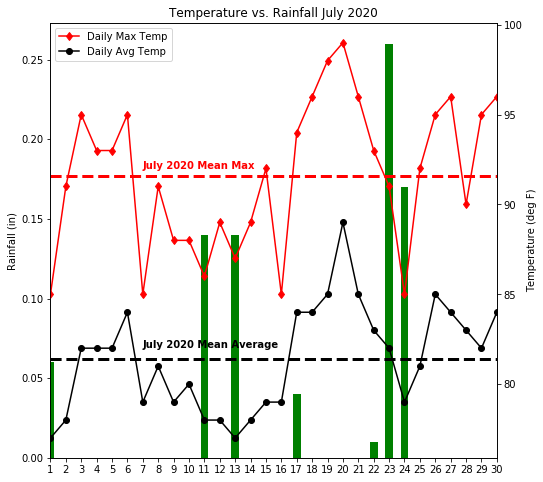

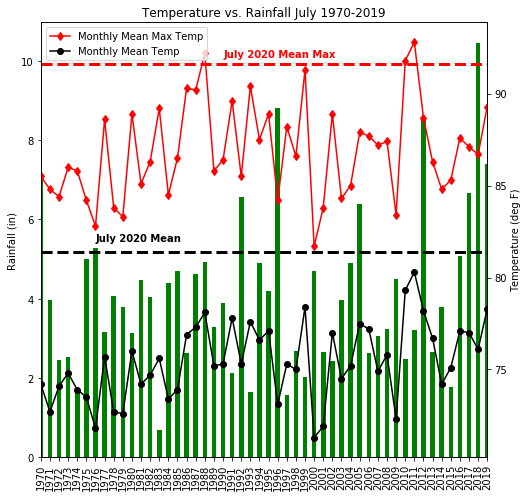

July 2020 was the warmest and 2nd driest on record since 1970!


In [61]:
# Plot daily temperatures and rainfall for July 2020
fig = plt.figure(figsize=(8, 8))
ax = july2020['Rainfall'].plot(kind='bar', color='g', label='Rainfall')
ax1 = july2020['Max Temp'].plot(kind='line', color='r', marker='d', secondary_y=True, label='Daily Max Temp')
ax2 = july2020['Avg Temp'].plot(kind='line', color='k', marker='o', secondary_y=True, label='Daily Avg Temp')
x1 = np.arange(30)
y1 = np.full(30,mean_maxtemp)
plt.plot(x1,y1,'r--',linewidth=3)
plt.text(6,92,'July 2020 Mean Max', weight='bold', color = 'r', fontsize=10)
x2 = np.arange(30)
y2 = np.full(30,mean_avgtemp)
plt.text(6,82,'July 2020 Mean Average', weight='bold', color = 'k', fontsize=10)
plt.plot(x2,y2,'k--',linewidth=3)
plt.title('Temperature vs. Rainfall July 2020')
plt.xlabel("Day of Month")
plt.xticks(np.arange(30),day_list)
ax.set_ylabel('Rainfall (in)')
ax2.set_ylabel('Temperature (deg F)')
plt.legend(loc='upper left')
plt.savefig("July2020.png",dpi=250,bbox_inches='tight')
plt.show()

# Plot monthly mean temperatures and rainfall for July 1970 - 2019
fig = plt.figure(figsize=(8, 8))
ax = july['Rainfall'].plot(kind='bar', color='g')
ax1 = july['Max Temp'].plot(kind='line', color='r', marker='d', secondary_y=True, label='Monthly Mean Max Temp')
ax2 = july['Mean Temp'].plot(kind='line', color='k', marker='o', secondary_y=True, label='Monthly Mean Temp')
x1 = np.arange(50)
y1 = np.full(50,mean_maxtemp)
plt.plot(x1,y1,'r--',linewidth=3)
plt.text(20,92,'July 2020 Mean Max', weight='bold', color = 'r', fontsize=10)
x2 = np.arange(50)
y2 = np.full(50,mean_avgtemp)
plt.text(6,82,'July 2020 Mean', weight='bold', color = 'k', fontsize=10)
plt.plot(x2,y2,'k--',linewidth=3)
plt.title('Temperature vs. Rainfall July 1970-2019')
plt.xlabel("Year")
plt.xticks(np.arange(50))
ax.set_xticklabels(july['Year'], rotation = 90)
ax.set_ylabel('Rainfall (in)')
ax2.set_ylabel('Temperature (deg F)')
plt.legend(loc='upper left')
plt.savefig("July1970_2019.png",dpi=250,bbox_inches='tight')
plt.show()
print("July 2020 was the warmest and 2nd driest on record since 1970!")

Graph comparison demonstrates that July 2020 was the warmest on record since 1970 here in New Market, MD.